# Ejercicio Final Aprendizaje Automatico 



# Importado de librerias

In [ ]:
from textblob import TextBlob
import nltk as nlp

nlp.download('punkt')
nlp.download('averaged_perceptron_tagger')
nlp.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.colors as mcolors


from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

## Importado del dataset

In [ ]:
path = '/content/sample_data/tripadvisor_hotel_reviews.csv'

df = pd.read_csv(path)

#### Informacion principal sobre el dataset

In [ ]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
df.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


### Trabajo con el texto dentro de las reviews

In [ ]:
text = "".join(' '+str(response) for response in df.Review.values if (not(pd.isnull(response))))

In [ ]:
text_splited = pd.Series(text.split())

print('En las Reviews tenemos {} palabras diferentes \n'.format(len(np.unique(text_splited))))


print('Las 50 palabras mas repetidas en las Reviews son: ')
text_splited.value_counts(normalize=True)[:50].index

En las Reviews tenemos 102008 palabras diferentes 

Las 50 palabras mas repetidas en las Reviews son: 


Index(['hotel', 'not', 'room', 'great', 'n't', 'staff', 'good', 'did', 'just',
       'stay', 'no', 'rooms', 'nice', 'stayed', 'location', 'service',
       'breakfast', 'beach', 'food', 'like', 'clean', 'time', 'really',
       'night', 'day', 'hotel,', 'pool', 'place', 'resort', 'little', 'people',
       'small', 'got', 'friendly', 'walk', '2', 'best', 'excellent', 'area',
       'restaurant', 'bar', 'went', 'water', 'bathroom', 'recommend', 'bed',
       'restaurants', 'trip', '3', 'desk'],
      dtype='object')

In [ ]:
df.Review[67]

"ace not place husband stayed ace hotel seattle nights excited book room style hotel far alley floral bb motel 6. happy impressions, room decent sized bright corner windows it__Ç_é_ pictured website shepard fairey wall, asked desk clerk parking does state website street parking available, n't tell got street parking stay 8am start charging.__Ç n't lot info drug luggage room, headed bed things got worse, bed size not listed website assumed queen, beds sized sleeping comfortably little difficult n't sleep happening room, room bar loading/delivery zone corner bus stop, noise staggering continued night morning wake early feed meter, glowing light hall showing window door annoying saw turned, day requested fairness rest staff dealt nice accommodating unable following night hotel, plus shared bathrooms issue finding free breakfast did include coffee tea fresh waffles toast granola juice yogurt apples, piles good magazines available guests robes rooms use, second night slept slightly better u

### Estrategia de limpieza

> Lo que vamos a hacer es usar las siguientes herramientas:

    - Una pequeña normalizacion de la data usando la libreria 're' para reemplazar 
    los caracteres que no queremos y luego la funcion lower() para que este todo en minusculas
    -  word_tokenize lo que hace es devolvernos un vector con cada palabra de la review.
    - WordNetLemmatizer es una funion pre-entrenada que nos ayuda llevando las palabras a su forma raiz,
     disminuyendo la cantidad de palbras unicas.

In [ ]:
review_list=[]

for review in df.Review:
    review=re.sub("[^a-zA-z]"," ",review) # if expression in the sentence is not a word then this code change them to space
    review=review.lower() # turns all word in the sentence into lowercase.
    review=nlp.word_tokenize(review) # splits the words that are in the sentence from each other.
    lemma=nlp.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review] # this code finds the root of the word for a word in the sentence and change them to their root form.
    review=" ".join(review)
    review_list.append(review) # store sentences in list

df['Review_clean'] = pd.Series(review_list)

In [ ]:
text2 = "".join(' '+str(response) for response in df.Review_clean.values if (not(pd.isnull(response))))

text_splited2 = pd.Series(text2.split())

print('Luego de hacer el cleaning en Reviews tenemos {} palabras diferentes \n'.format(len(np.unique(text_splited2))))


print('Las 50 palabras mas repetidas despues de la limpieza de reviews Reviews son: ')
text_splited2.value_counts(normalize=True)[:50].index


Luego de hacer el cleaning en Reviews tenemos 45839 palabras diferentes 

Las 50 palabras mas repetidas despues de la limpieza de reviews Reviews son: 


Index(['hotel', 'room', 'not', 'great', 't', 'n', 'good', 'staff', 'stay',
       'night', 'did', 'day', 'time', 'just', 'nice', 'no', 'location',
       'service', 'beach', 'stayed', 'restaurant', 'breakfast', 'food',
       'clean', 'place', 'resort', 'pool', 'like', 'really', 'bed', 'the',
       'area', 'bar', 'friendly', 'people', 'small', 'walk', 'little', 'got',
       'excellent', 'view', 'bathroom', '_', 'minute', 'best', 'helpful',
       'trip', 'floor', 'water', 'lot'],
      dtype='object')

In [ ]:
text_splited2.value_counts(normalize=True)[50:100].index

Index(['price', 'recommend', 'make', 'review', 'beautiful', 'thing', 'went',
       'comfortable', 'problem', 'desk', 'drink', 'want', 'check', 'way',
       'right', 'city', 'free', 'street', 'better', 'away', 'wonderful',
       'buffet', 'bit', 'booked', 'hour', 'say', 'large', 'need', 'experience',
       'quite', 'new', 'week', 'lobby', 'morning', 'door', 'shower', 'star',
       'close', 'loved', 'going', 'year', 'definitely', 'airport', 'big',
       'lovely', 'fantastic', 'th', 'guest', 'think', 'perfect'],
      dtype='object')

In [ ]:
df[df.Review.str.contains("_", regex=True)]

,Review,Rating,Review_clean
15,horrible customer service hotel stay february ...,1,horrible customer service hotel stay february ...
20,service service service spent week g-friend la...,5,service service service spent week g friend la...
67,ace not place husband stayed ace hotel seattle...,3,ace not place husband stayed ace hotel seattle...
384,not good respect frequent business traveler se...,1,not good respect frequent business traveler se...
400,"great stay, got decent price standard room kin...",5,great stay got decent price standard room king...
...,...,...,...
20335,"location, location, location, stay hotel axial...",5,location location location stay hotel axial mo...
20359,great pleasant surprise march 20-21 march 29 b...,4,great pleasant surprise march march beach hous...
20363,perfect spot unique boutique overused days hot...,5,perfect spot unique boutique overused day hote...
20388,loved tuskany booked hotel silla reading revie...,4,loved tuskany booked hotel silla reading revie...


In [ ]:
df.Review[67]

"ace not place husband stayed ace hotel seattle nights excited book room style hotel far alley floral bb motel 6. happy impressions, room decent sized bright corner windows it__Ç_é_ pictured website shepard fairey wall, asked desk clerk parking does state website street parking available, n't tell got street parking stay 8am start charging.__Ç n't lot info drug luggage room, headed bed things got worse, bed size not listed website assumed queen, beds sized sleeping comfortably little difficult n't sleep happening room, room bar loading/delivery zone corner bus stop, noise staggering continued night morning wake early feed meter, glowing light hall showing window door annoying saw turned, day requested fairness rest staff dealt nice accommodating unable following night hotel, plus shared bathrooms issue finding free breakfast did include coffee tea fresh waffles toast granola juice yogurt apples, piles good magazines available guests robes rooms use, second night slept slightly better u

In [ ]:
df[df.Review.str.contains("n't", regex=True)]

,Review,Rating,Review_clean
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experience hotel monaco seattle ...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...
5,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...
10,"poor value stayed monaco seattle july, nice ho...",2,poor value stayed monaco seattle july nice hot...
...,...,...,...
20483,good bed clean convenient just night happy sta...,4,good bed clean convenient just night happy sta...
20486,"best kept secret 3rd time staying charm, not 5...",5,best kept secret rd time staying charm not sta...
20488,"ok just looks nice modern outside, desk staff ...",2,ok just look nice modern outside desk staff n ...
20489,hotel theft ruined vacation hotel opened sept ...,1,hotel theft ruined vacation hotel opened sept ...


- Con esto podemos observar que el texto que tenemos no es semanticamente correcto y esto afectara el entrenamiento de nuestros modelos. Y que las estrategias de limpieza propuestas reducieron mas de 50% de las palabras unicas.

 > Tareas a realizar: 

      1. Reemplazo de los n't
      2. Encontrar patron de __Ç _é_ y __Ç
      3. Trabajar con los simbolos sueltos
      4. Hay espacios mal implementados

# Analisis de las Reviews

### Extraccion del Sentimiento basado en Polaridad, Subjetitividad, Longitud y Cantidad de palabras.

Para esto nos vamos apoyar en el la libreria de TextBlob que esta contruida sobre nltk y nos permite algo mas high level.

[Intuicion de como es que funciona la parte de Extraccion de Polaridad y Subjetividad con TextBlob](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjBkq2w_sPsAhULFrkGHaerA3kQFjABegQIBBAC&url=https%3A%2F%2Fplanspace.org%2F20150607-textblob_sentiment%2F&usg=AOvVaw1A6Qn55Q_7lgx1hg5ET9sB)

In [ ]:
df['polarity'] = df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['subjectivity'] = df['Review'].map(lambda text: TextBlob(text).sentiment.subjectivity)
df['review_len'] = df['Review'].astype(str).apply(len)
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head(10)

,Review,Rating,Review_clean,polarity,subjectivity,review_len,word_count
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,0.208744,0.687000,593,87
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0.214923,0.495009,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,nice room not experience hotel monaco seattle ...,0.294420,0.605208,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...,0.504825,0.691228,600,89
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...,0.384615,0.629396,1281,191
5,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...,0.243056,0.614583,1002,134
6,"cozy stay rainy city, husband spent 7 nights m...",5,cozy stay rainy city husband spent night monac...,0.366661,0.631890,748,101
7,"excellent staff, housekeeping quality hotel ch...",4,excellent staff housekeeping quality hotel cho...,0.562963,0.788889,597,85
8,"hotel stayed hotel monaco cruise, rooms genero...",5,hotel stayed hotel monaco cruise room generous...,0.312946,0.576786,419,59
9,excellent stayed hotel monaco past w/e delight...,5,excellent stayed hotel monaco past w e delight...,0.286355,0.534066,271,35


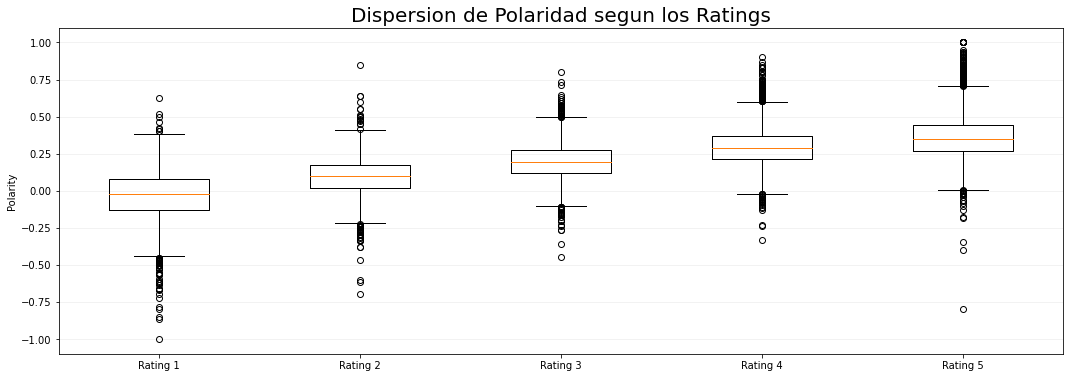

In [ ]:

plt.figure(figsize=(18,6))
plt.boxplot((df[df['Rating']==1]['polarity'].values, 
             df[df['Rating']==2]['polarity'].values, 
             df[df['Rating']==3]['polarity'].values, 
             df[df['Rating']==4]['polarity'].values,
             df[df['Rating']==5]['polarity'].values),
            labels=['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5'] 
            )
plt.title('Dispersion de Polaridad segun los Ratings', size=20)
plt.ylabel('Polarity')
plt.grid(axis='y', alpha=0.2)
plt.show()


> Podemos observar en el grafico como los Ratings mas altos tenderian a tener valores de polaridad mas elevados que las reviews de ratings mas bajos.

__Se deberia testear con el correspondiente test de hipotesis para asegurarlo__

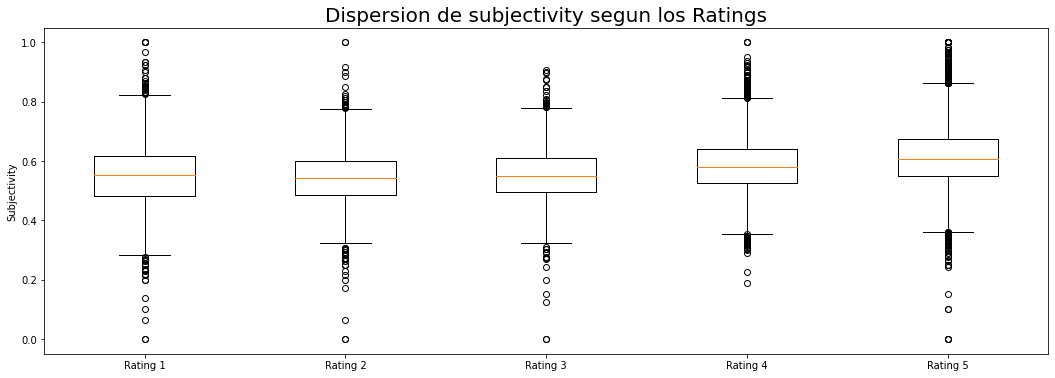

In [ ]:
plt.figure(figsize=(18,6))
plt.boxplot((df[df['Rating']==1]['subjectivity'].values, 
             df[df['Rating']==2]['subjectivity'].values, 
             df[df['Rating']==3]['subjectivity'].values, 
             df[df['Rating']==4]['subjectivity'].values,
             df[df['Rating']==5]['subjectivity'].values),
            labels=['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5'] 
            )
plt.title('Dispersion de subjectivity segun los Ratings', size=20)
plt.ylabel('Subjectivity')
plt.show()


> La subjetividad no parece variar segun el Rating de la review.

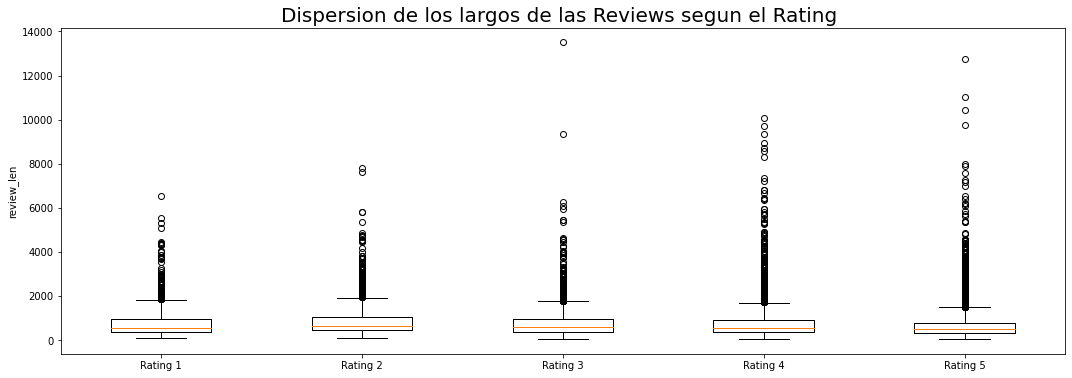

In [ ]:
plt.figure(figsize=(18,6))
plt.boxplot((df[df['Rating']==1]['review_len'].values, 
             df[df['Rating']==2]['review_len'].values, 
             df[df['Rating']==3]['review_len'].values, 
             df[df['Rating']==4]['review_len'].values,
             df[df['Rating']==5]['review_len'].values),
            labels=['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5'] 
            )
plt.title('Dispersion de los largos de las Reviews segun el Rating ', size=20)
plt.ylabel('review_len')
plt.show()

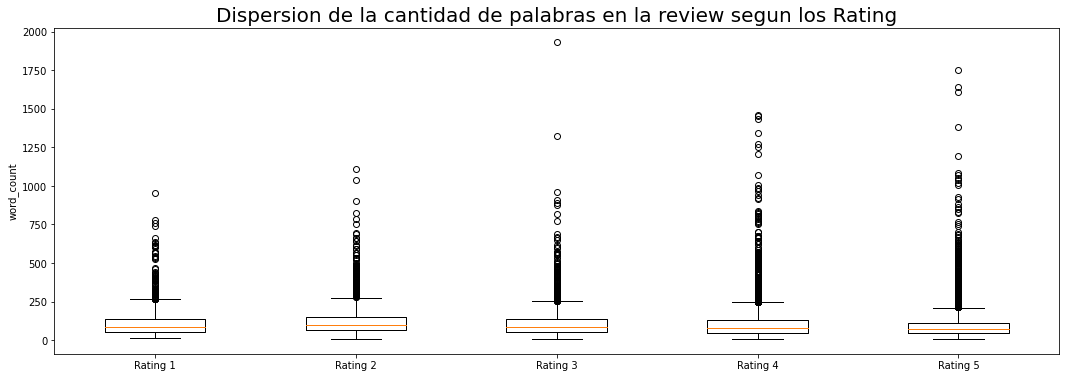

In [ ]:
plt.figure(figsize=(18,6))
plt.boxplot((df[df['Rating']==1]['word_count'].values, 
             df[df['Rating']==2]['word_count'].values, 
             df[df['Rating']==3]['word_count'].values, 
             df[df['Rating']==4]['word_count'].values,
             df[df['Rating']==5]['word_count'].values),
            labels=['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5'] 
            )
plt.title('Dispersion de la cantidad de palabras en la review segun los Rating', size=20)
plt.ylabel('word_count')
plt.show()

In [ ]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = df.loc[df.polarity == 1, ['Review']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

cant fault, excellent time n't fault staff excellent food perfect, days want desperatley, 23/7/03,  
excellent excellent excellent.., stayed nights start november, excellent location excellent staff excellent price,  
did not disappoint superb hotel needs lifts elevators prefer smiles staff hong kong inspired pastry chefs poached hyatt, make heavenly,  
perfect location service stayed hotel la perle 10 times consider staying hotel paris, hotel perfect location paris excellent service,  
number hotel number ranking, perfect way, best breakfast world,  


In [ ]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl = df.loc[df.polarity == 0, ['Review']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

nothing like windham el san juan traveled extensively ther abroad, windham el san juan experience recommend, class facility, want wear shorts tanktop day nite not,  
une trappe touristes 4* ne pas approcher des boutiques sur la plage vous ne pourrez pas ressortir sans avoir achetÄ,  
double-booked, couple months ago booked room view degli orafi nights hotel website week june, just got email days ago hotel stating internet programming software mistakenly booked room twice offering different room no longer view, reading overbooking comments wondering truly booking error not, deciding accept room not,  
dog day afternoon dump, infested roaches molds wold not let dog stay, book hotel paid not stay all. pay day gave credit card,  
need improvement customer service stayed hotel nights 250 night, break negatives positivies hotel.negatives:1. desk people not know, got lost looking hotel traffic way streets called land mark di

### Analisis de las distribuciones obtenidas

In [ ]:
xticks = np.arange(df['polarity'].min(), 
                   df['polarity'].max(), 
                   (df['polarity'].max()-df['polarity'].min())/25)



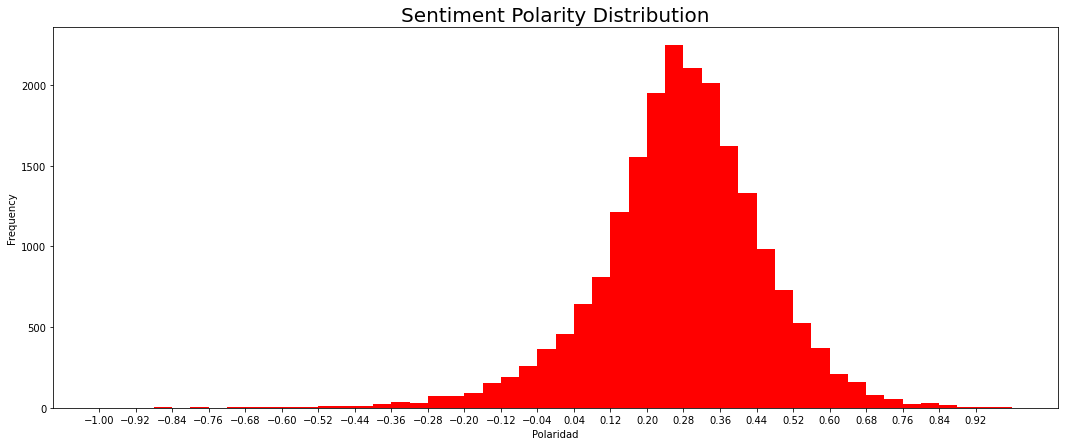

In [ ]:
df['polarity'].plot(
    kind='hist',
    bins=50,
    figsize=(18,7),
    color='red',
    xticks= xticks)

plt.title('Sentiment Polarity Distribution', size=20)
plt.xlabel('Polaridad')
plt.show()

In [ ]:
xticks = np.arange(df['subjectivity'].min(), 
                   df['subjectivity'].max(), 
                   (df['subjectivity'].max()-df['polarity'].min())/50)

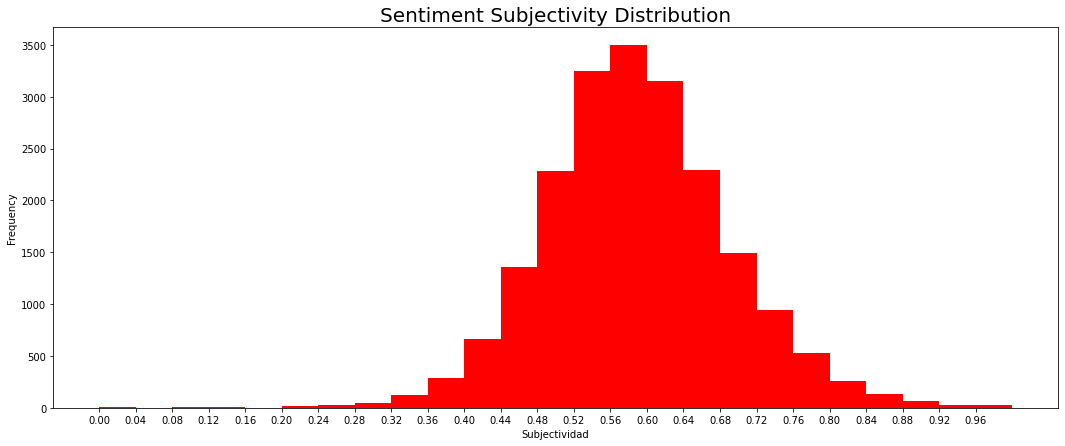

In [ ]:
df['subjectivity'].plot(
    kind='hist',
    bins=25,
    figsize=(18,7),
    color='red',
    xticks= xticks)

plt.title('Sentiment Subjectivity Distribution', size=20)
plt.xlabel('Subjectividad')
plt.show()

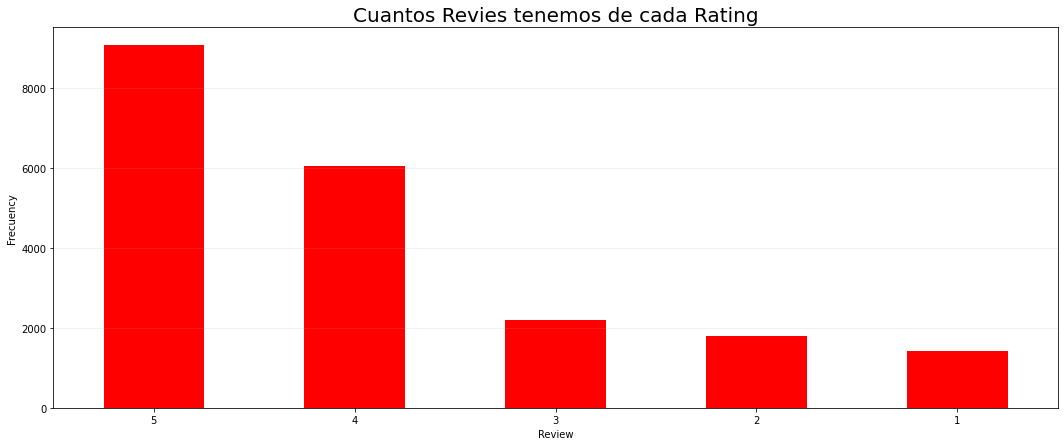

In [ ]:

df['Rating'].value_counts().plot(kind='bar', color='red', figsize=(18,7))
plt.title('Cuantos Revies tenemos de cada Rating', size=20)
plt.ylabel('Frecuency')
plt.xlabel('Review')
plt.grid(axis='y', alpha=0.2)
plt.xticks(rotation=0)
plt.show()

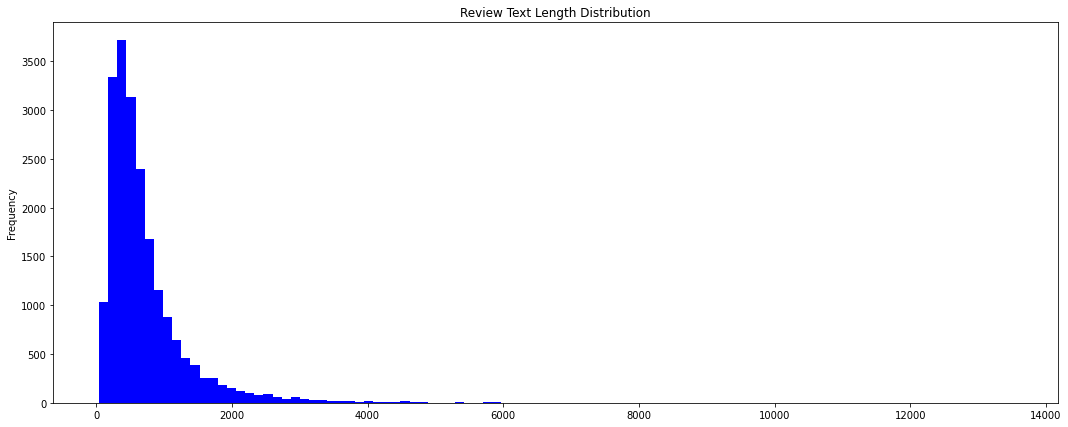

In [ ]:
df['review_len'].plot(
    kind='hist',
    bins=100,
    figsize=(18,7),
    color='blue',
    title='Review Text Length Distribution')

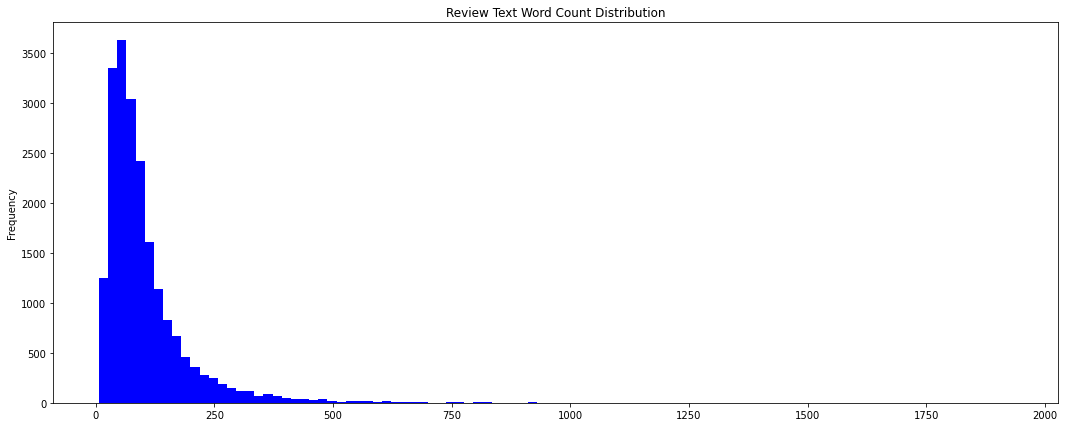

In [ ]:
df['word_count'].plot(
    kind='hist',
    bins=100,
    figsize=(18,7),
    color='blue',
    title='Review Text Word Count Distribution')

In [ ]:
df.corr()

,Rating,polarity,subjectivity,review_len,word_count
Rating,1.000000,0.647341,0.237928,-0.080565,-0.090674
polarity,0.647341,1.000000,0.448693,-0.213692,-0.219149
subjectivity,0.237928,0.448693,1.000000,-0.211817,-0.214748
review_len,-0.080565,-0.213692,-0.211817,1.000000,0.997558
word_count,-0.090674,-0.219149,-0.214748,0.997558,1.000000


##   2. Analisis de los N-Grams

In [ ]:
np.linspace(0.5, 0, 25)

array([0.5       , 0.47916667, 0.45833333, 0.4375    , 0.41666667,
       0.39583333, 0.375     , 0.35416667, 0.33333333, 0.3125    ,
       0.29166667, 0.27083333, 0.25      , 0.22916667, 0.20833333,
       0.1875    , 0.16666667, 0.14583333, 0.125     , 0.10416667,
       0.08333333, 0.0625    , 0.04166667, 0.02083333, 0.        ])

In [ ]:
def palabras_frequentes(data, n=25, axis=None):
  text = "".join(' '+str(response) for response in data['Review'].values if (not(pd.isnull(response))))
  text_splited = pd.Series(text.split())
  
  num = np.arange(n)
  palbras = text_splited.value_counts(normalize=True)[:n].index
  count = text_splited.value_counts(normalize=True)[:n]
 

#  colors = list(mcolors.CSS4_COLORS)[10:n+10]
  colors = plt.cm.hot(np.linspace(0.5, 0, n))
  
  axis.bar(palbras, count, color=colors)
  axis.set_title('Palabras mas frecuentes segun el rank #{}'.format(data.reset_index()['Rating'][0]),
            size=20)
  axis.set_xlabel('Palabras')
  axis.set_ylabel('Frecuencia')
  axis.set_xticklabels(palbras, rotation=45)
  


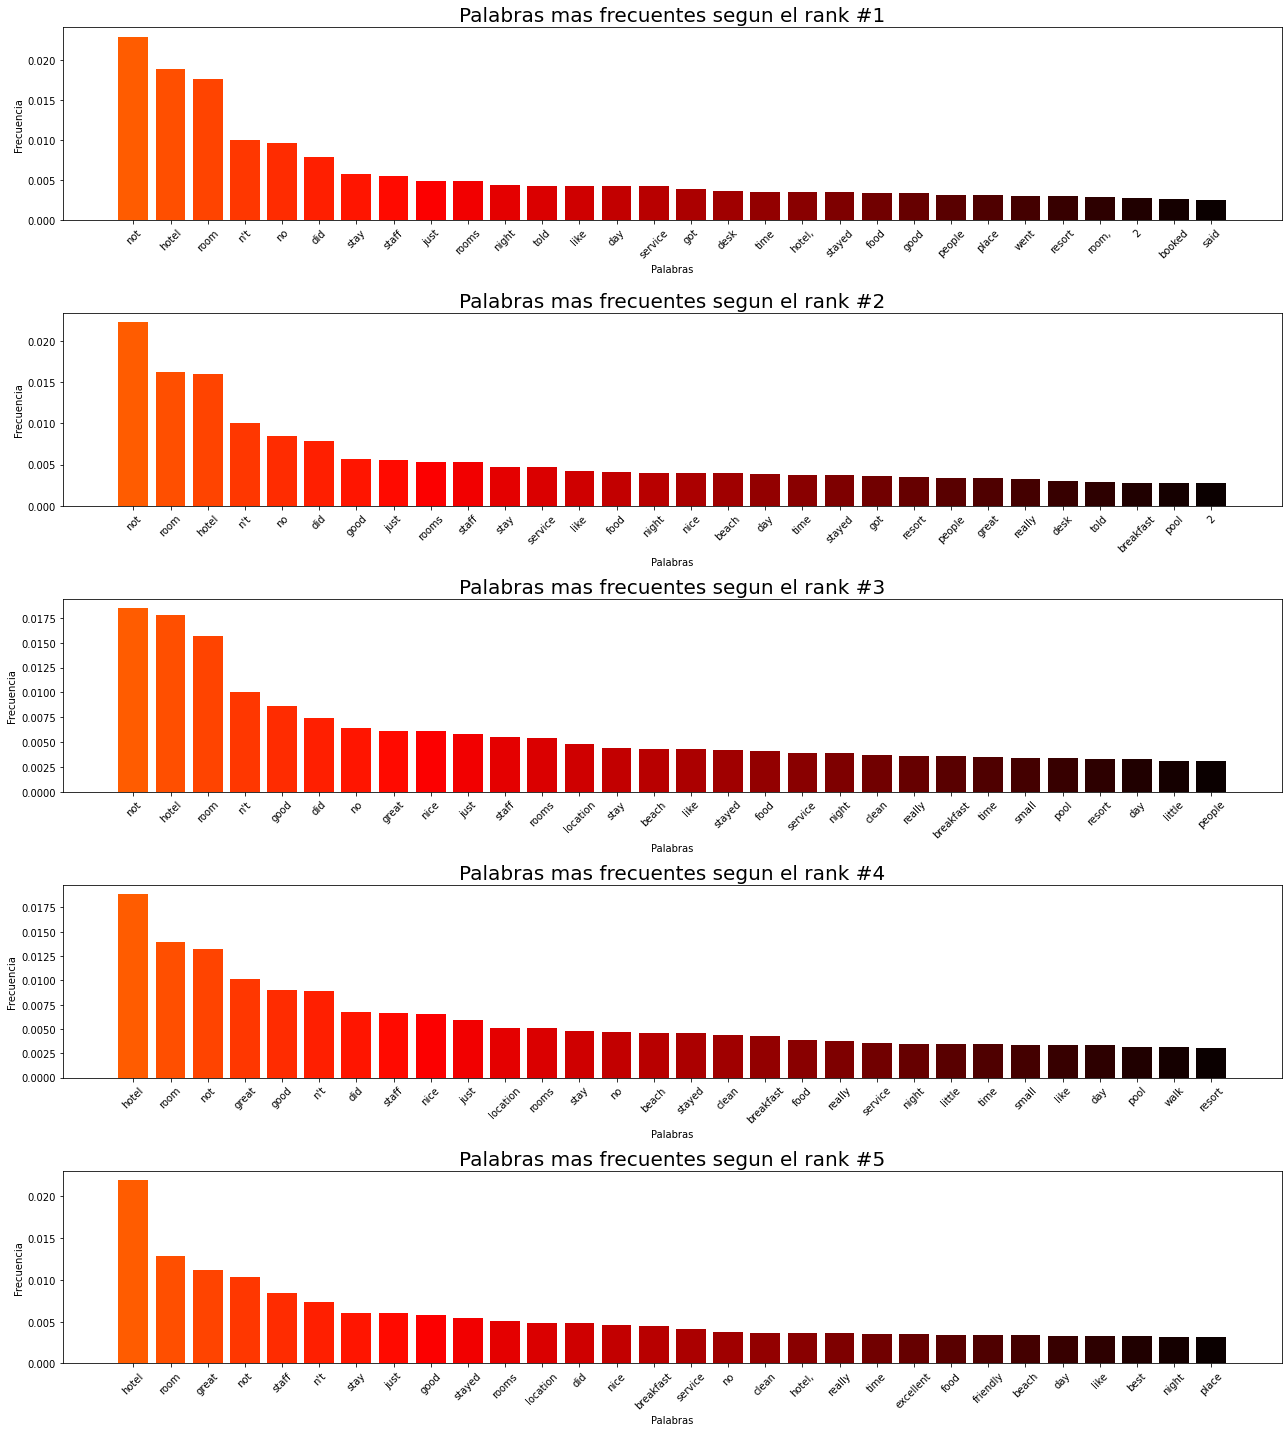

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(18,20))

palabras_frequentes(df[df['Rating']==1], n=30, axis=axs.flat[0])
palabras_frequentes(df[df['Rating']==2], n=30, axis=axs.flat[1])
palabras_frequentes(df[df['Rating']==3], n=30, axis=axs.flat[2])
palabras_frequentes(df[df['Rating']==4], n=30, axis=axs.flat[3])
palabras_frequentes(df[df['Rating']==5], n=30, axis=axs.flat[4])

plt.tight_layout()

> Podemos observar en el grafico como las palabras mas repetidas son en su mayoria las mismas o con frecuencias distintas lo cual me parece que no aporta mucho granularidad de informacion.


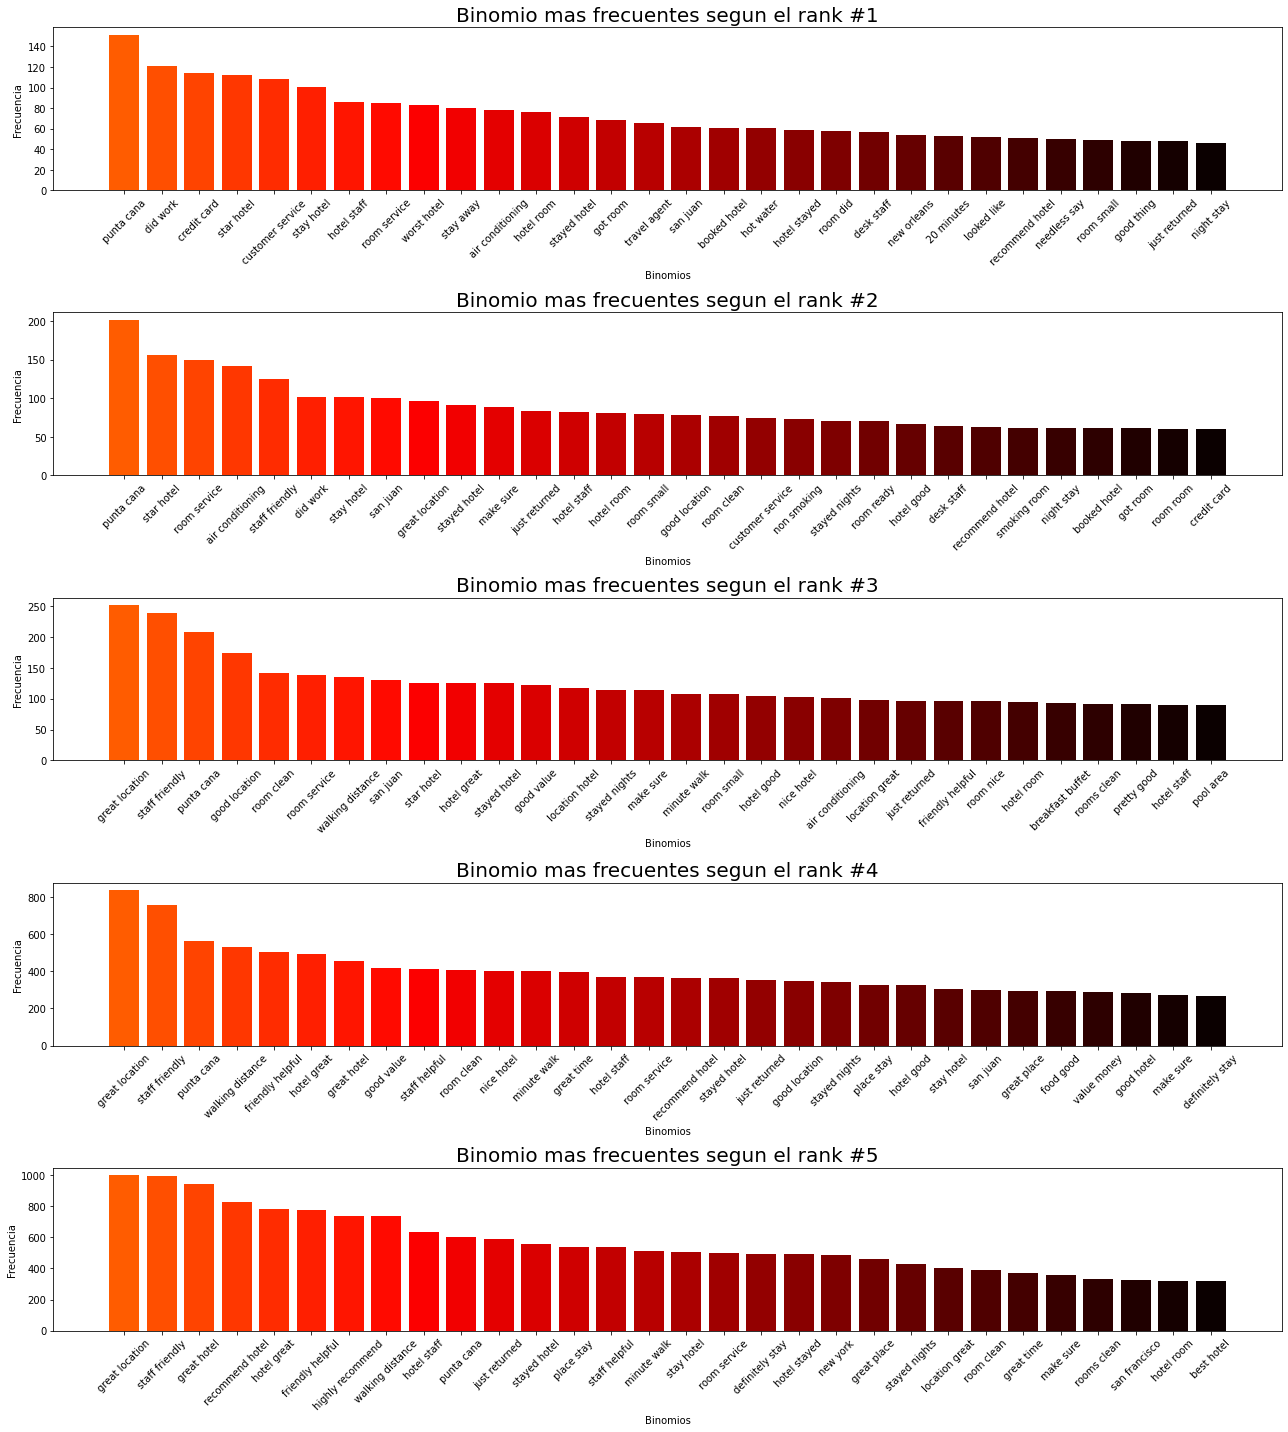

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    df_words =  pd.DataFrame(words_freq[:n], columns = ['ReviewWords' , 'count'])
    return df_words

def plot_bars_2 (data, n=None, rating=None, axes=None):
  colors = plt.cm.hot(np.linspace(0.5, 0, n))

  axes.bar(data['ReviewWords'], data['count'], color=colors)
  axes.set_title('Binomio mas frecuentes segun el rank #{}'.format(rating),
          size=20)
  axes.set_xlabel('Binomios')
  axes.set_ylabel('Frecuencia')
  axes.set_xticklabels(data['ReviewWords'], rotation=45)


common_words_r1 = get_top_n_bigram(df[df['Rating']==1]['Review'], 30)
common_words_r2 = get_top_n_bigram(df[df['Rating']==2]['Review'], 30)
common_words_r3 = get_top_n_bigram(df[df['Rating']==3]['Review'], 30)
common_words_r4 = get_top_n_bigram(df[df['Rating']==4]['Review'], 30)
common_words_r5 = get_top_n_bigram(df[df['Rating']==5]['Review'], 30)



fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(18,20))

plot_bars_2(common_words_r1, n=30, rating=1, axes=axs.flat[0])
plot_bars_2(common_words_r2, n=30, rating=2, axes=axs.flat[1])
plot_bars_2(common_words_r3, n=30, rating=3, axes=axs.flat[2])
plot_bars_2(common_words_r4, n=30, rating=4, axes=axs.flat[3])
plot_bars_2(common_words_r5, n=30, rating=5, axes=axs.flat[4])

plt.tight_layout()

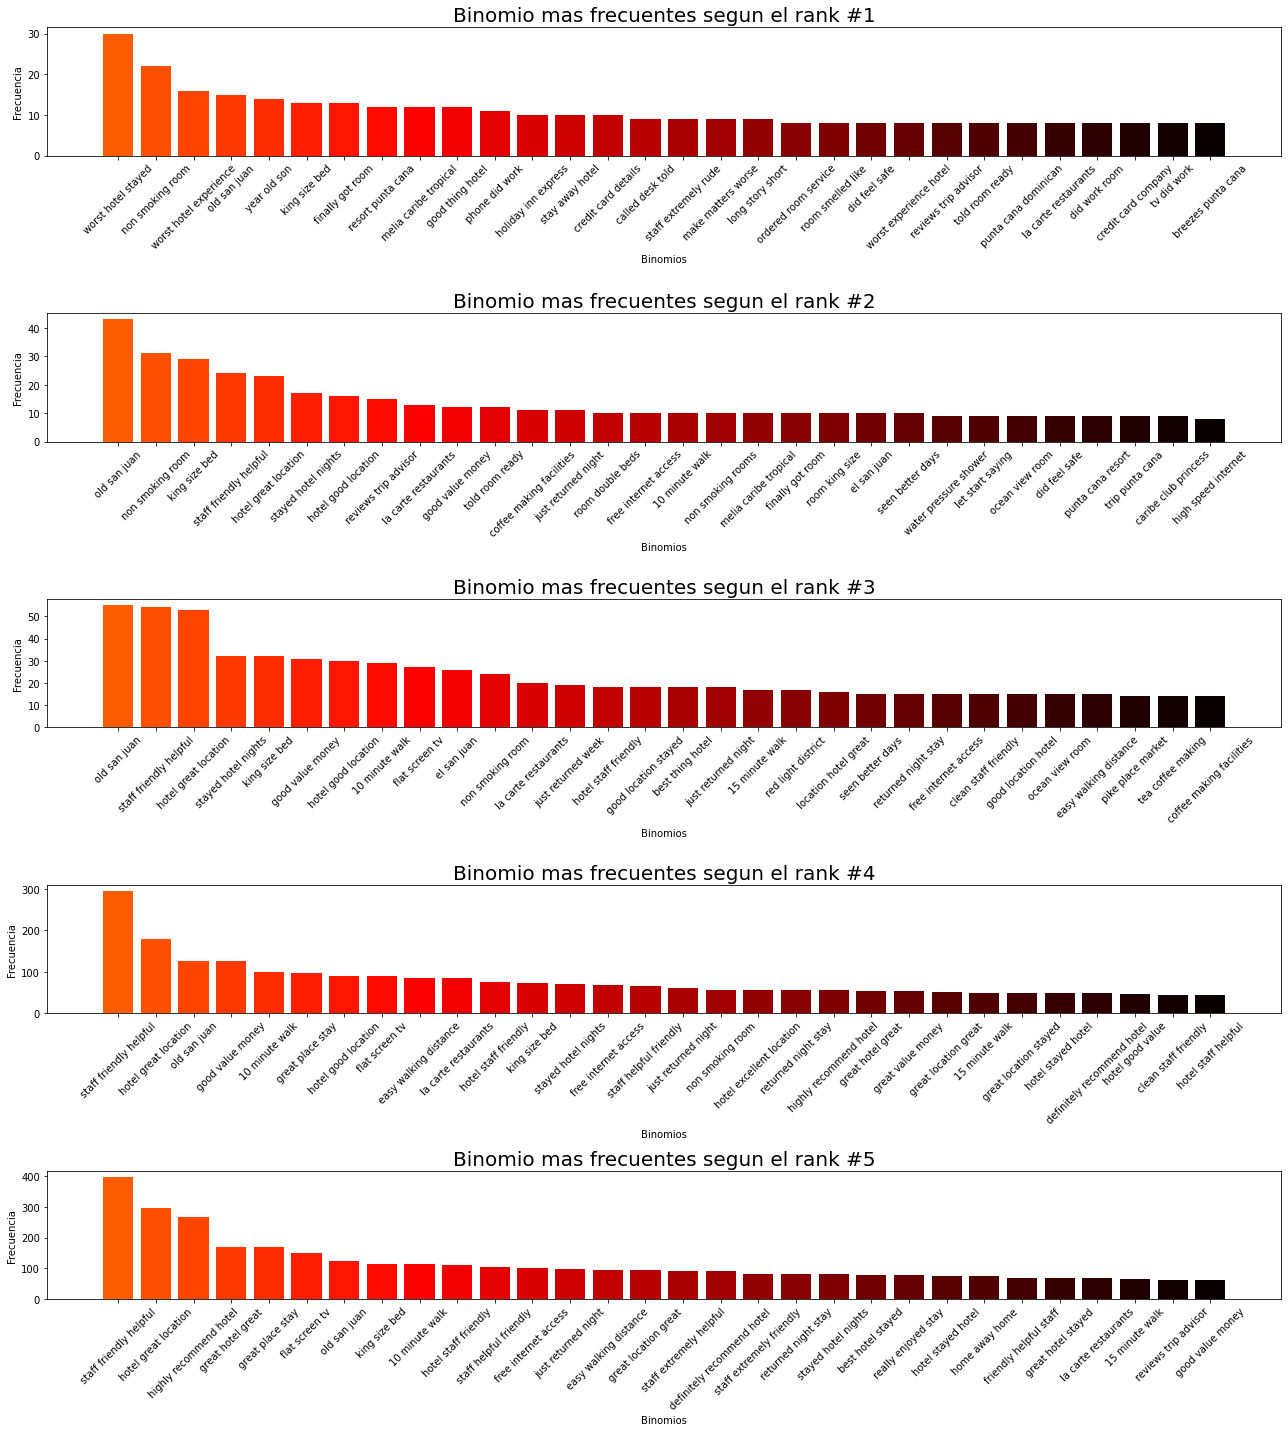

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    df_words =  pd.DataFrame(words_freq[:n], columns = ['ReviewWords' , 'count'])
    return df_words



common_words_r1 = get_top_n_trigram(df[df['Rating']==1]['Review'], 30)
common_words_r2 = get_top_n_trigram(df[df['Rating']==2]['Review'], 30)
common_words_r3 = get_top_n_trigram(df[df['Rating']==3]['Review'], 30)
common_words_r4 = get_top_n_trigram(df[df['Rating']==4]['Review'], 30)
common_words_r5 = get_top_n_trigram(df[df['Rating']==5]['Review'], 30)



fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(18,20))

plot_bars_2(common_words_r1, n=30, rating=1, axes=axs.flat[0])
plot_bars_2(common_words_r2, n=30, rating=2, axes=axs.flat[1])
plot_bars_2(common_words_r3, n=30, rating=3, axes=axs.flat[2])
plot_bars_2(common_words_r4, n=30, rating=4, axes=axs.flat[3])
plot_bars_2(common_words_r5, n=30, rating=5, axes=axs.flat[4])

plt.tight_layout()

> Podemos observar en los graficos como a medida que aumentamos los N-grams las pabras frecuentes varian un poco mas entre Ratings .

# Creacion de Features para los modelos
 - One Hot Encoding
 - Words Embeddings

 > Para esto vamos a usar las facilidades que nos proveen las librerias de sklearn mediante la funcion de CountVectorizer que practicamente en dos lineas de codigo nos ayuda a generar Vectores que representan las apariciones de las palabras en las Reviews.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

# cantidad de features que queremos
max_features=150 

# CountVectorizer para armar los vectores de cada palabra
count_vectorizer=CountVectorizer(max_features=max_features,stop_words="english") 

sparce_matrix=count_vectorizer.fit_transform(df['Review']).toarray()

#Nos guardamos las palabras segun quedaron ordenadas para poder usarlas despues
feature_names = count_vectorizer.get_feature_names()


In [ ]:
# Creamos una matriz aumentada para sumarle las features de polarity y subjectivity
mat_aumentada = np.zeros((sparce_matrix.shape[0],sparce_matrix.shape[1]+2))

mat_aumentada[:,:-2] = sparce_matrix

mat_aumentada[:,-2:] = np.array(df[['polarity','subjectivity']])

feature_names.append('polarity')
feature_names.append('subjectivity')

In [ ]:
#Definimos las variables 
X=mat_aumentada
y=df.Rating

# Modelado y Metricas

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,log_loss,precision_score
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import auc,roc_curve

#Spliteamos el dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (16392, 152)
x_test (4099, 152)
y_train (16392,)
y_test (4099,)


> Definimos la funcion get_mets para poder extraer los datos de la funcion de clasification report.

In [ ]:
def get_mets(x):
    metrics = []
    clases = []
    values = []
    report = x.split()
    for i in range(len(report)):
        if len(report[i]) > 5:
          metrics.append(report[i])
        if len(report[i]) == 1:
          clases.append(report[i])
        if len(report[i]) == 4:
          values.append(report[i])

    values = pd.Series(values, dtype=float)
    mask = values<1
    values = values[mask][:15]

    clases = sorted(clases*3)
    metrics = metrics[:3]*5

    return pd.DataFrame({'clases':clases, 'metrics':metrics, 'values':values.to_list()})



> Definimos la funcion roc_multi_label para poder plotear las curvas roc para todas las labels y ver como es que el modelo esta clasificandolas.

In [ ]:
def roc_multi_label(y_test, y_pred, n_classes):
  y_test_one = pd.get_dummies(y_test, prefix='class_').values
  y_pred_one = pd.get_dummies(y_pred, prefix='class_').values

  
  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(0,n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_one[:, i], y_pred_one[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Plot of a ROC curve for a specific class
  for i in range(0,n_classes):
      plt.figure()
      plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], 'k--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('ROC Curve para el Rating {}'.format(i+1))
      plt.legend(loc="lower right")
      plt.show()
  
  return roc_auc

## Random Forest

In [ ]:
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

y_pred_random = rf_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred_random))
print("Precision:",precision_score(y_test, y_pred_random, average="micro"))

Accuracy: 0.5596486948036107
Precision: 0.5596486948036107


In [ ]:
clas_rep = classification_report(y_test, y_pred_random)
print(clas_rep)

rf_class_rep_mets = get_mets(clas_rep)

              precision    recall  f1-score   support

           1       0.59      0.54      0.57       292
           2       0.37      0.31      0.34       333
           3       0.41      0.09      0.15       432
           4       0.47      0.38      0.42      1252
           5       0.62      0.85      0.72      1790

    accuracy                           0.56      4099
   macro avg       0.49      0.43      0.44      4099
weighted avg       0.53      0.56      0.53      4099



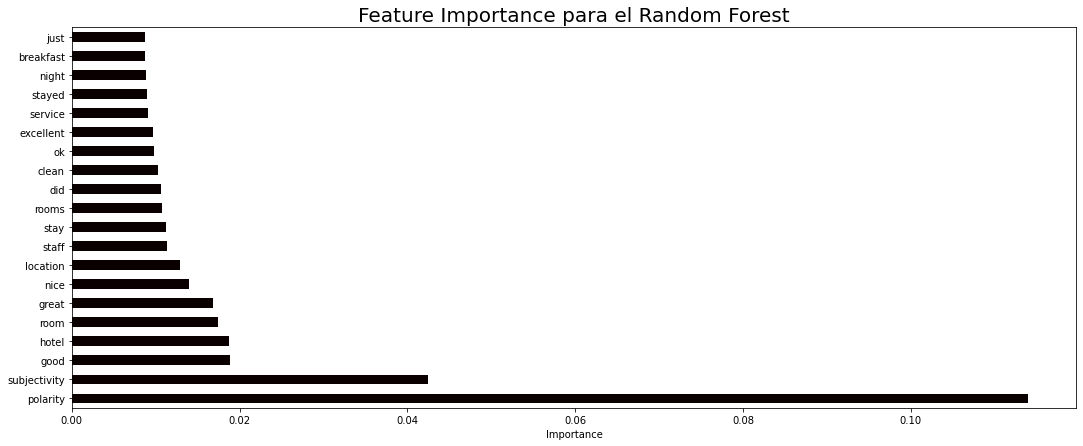

In [ ]:
feat_importances = pd.Series(rf_model.feature_importances_, index=feature_names)
n = 20
feat_importances.nlargest(n).plot(kind='barh', figsize=(18,7), colormap='hot')
plt.title('Feature Importance para el Random Forest', size=20)
plt.xlabel('Importance')
plt.show()


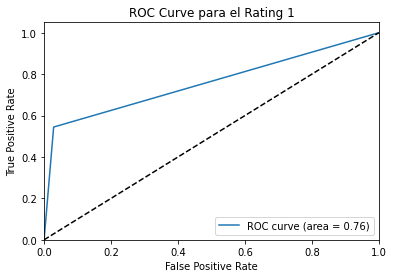

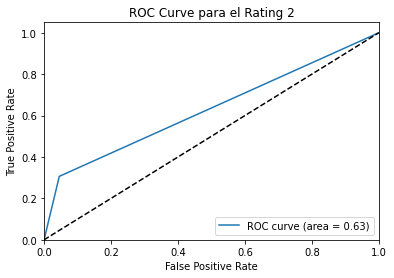

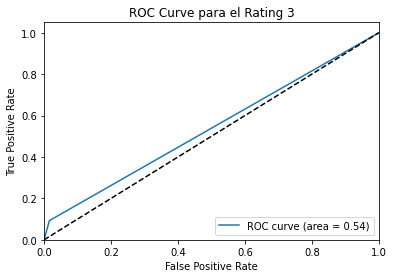

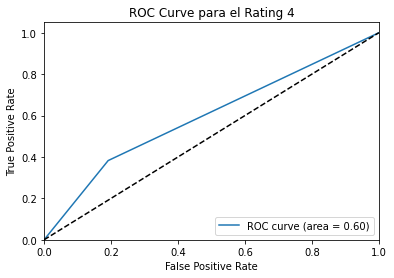

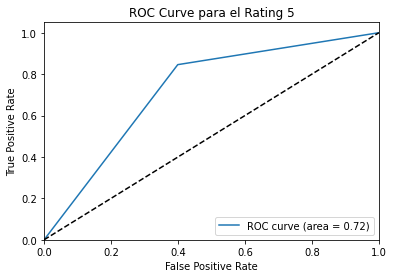

In [ ]:
roc_auc_random = roc_multi_label(y_test, y_pred_random, 5)

## LightGradientBoosting Model

In [ ]:
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_train,y_train)

y_pred_lgbm =lgbm_model.predict(X_test)



print("Accuracy:",accuracy_score(y_test, y_pred_lgbm))
print("Precision:",precision_score(y_test, y_pred_lgbm,average="micro"))

Accuracy: 0.58209319346182
Precision: 0.58209319346182


In [ ]:
clas_rep = classification_report(y_test, y_pred_lgbm)
print(clas_rep)

lgbm_class_rep_mets = get_mets(clas_rep)

              precision    recall  f1-score   support

           1       0.62      0.60      0.61       292
           2       0.37      0.38      0.38       333
           3       0.39      0.16      0.22       432
           4       0.50      0.43      0.46      1252
           5       0.66      0.83      0.73      1790

    accuracy                           0.58      4099
   macro avg       0.51      0.48      0.48      4099
weighted avg       0.56      0.58      0.56      4099



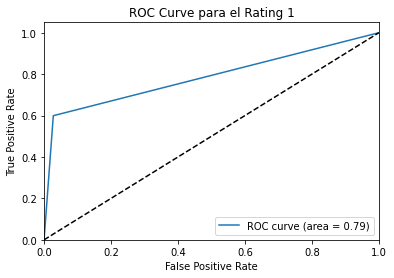

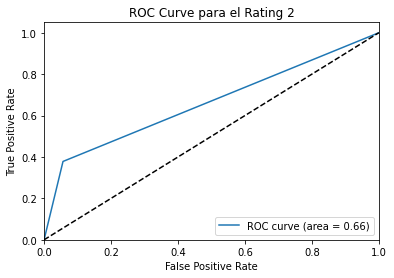

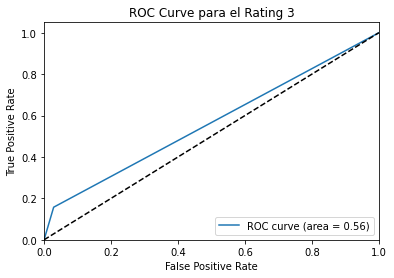

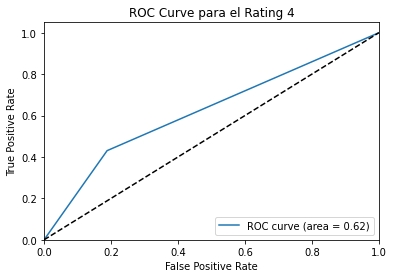

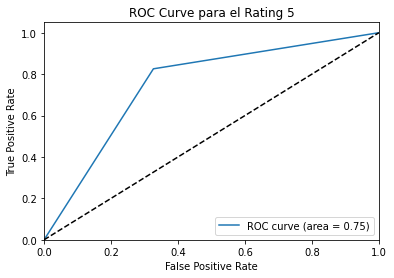

In [ ]:
roc_auc_lgbm = roc_multi_label(y_test, y_pred_lgbm, 5)

## XGBoosting Model

In [ ]:
xgb=XGBClassifier()
xgb_model=xgb.fit(X_train,y_train)

y_pred_xgb = xgb_model.predict(X_test)


print("Accuracy:",accuracy_score(y_test, y_pred_xgb))
print("Precision:",precision_score(y_test, y_pred_xgb,average="micro"))



Accuracy: 0.5713588680165894
Precision: 0.5713588680165894


In [ ]:
clas_rep = classification_report(y_test, y_pred_xgb)
print(clas_rep)

xgb_class_rep_mets = get_mets(clas_rep)

              precision    recall  f1-score   support

           1       0.61      0.55      0.58       292
           2       0.34      0.36      0.35       333
           3       0.43      0.09      0.15       432
           4       0.50      0.41      0.45      1252
           5       0.64      0.84      0.73      1790

    accuracy                           0.57      4099
   macro avg       0.50      0.45      0.45      4099
weighted avg       0.55      0.57      0.54      4099



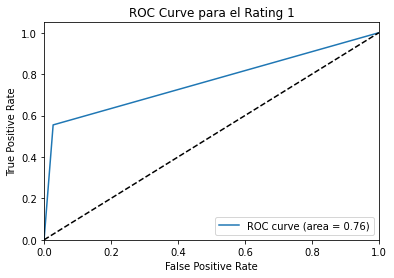

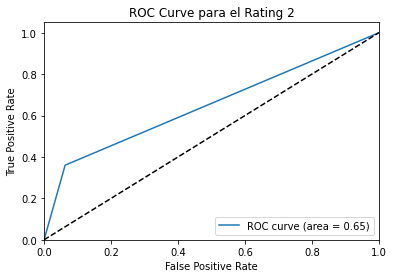

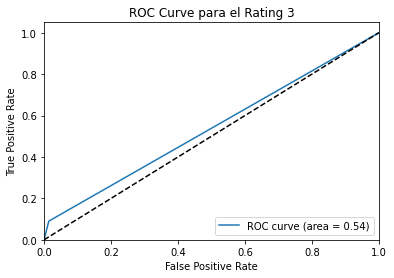

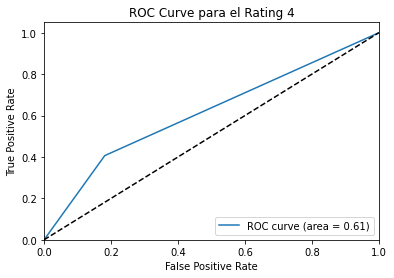

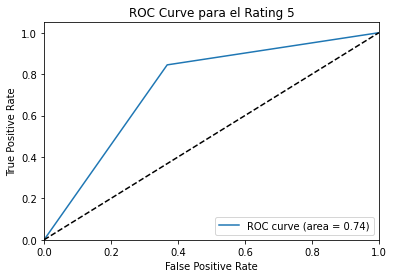

In [ ]:
roc_auc_xgb = roc_multi_label(y_test, y_pred_xgb, 5)

## Naive Bayes Model

In [ ]:
nb=GaussianNB()
nb2=BernoulliNB()

nb_model=nb.fit(X_train,y_train)
nb2_model=nb2.fit(X_train,y_train)

y_pred_nb=nb_model.predict(X_test)
y_pred_nb2=nb2_model.predict(X_test)


print("Accuracy:",accuracy_score(y_test, y_pred_nb))
print("Precision:",precision_score(y_test, y_pred_nb,average="micro"))
print("**************************************************************")
print("Accuracy_NB2:",accuracy_score(y_test, y_pred_nb2))
print("Precision_NB2:",precision_score(y_test, y_pred_nb2,average="micro"))

Accuracy: 0.49597462795803854
Precision: 0.49597462795803854
**************************************************************
Accuracy_NB2: 0.5123200780678214
Precision_NB2: 0.5123200780678214


In [ ]:
clas_rep = classification_report(y_test, y_pred_nb)
print(clas_rep)

nb_class_rep_mets = get_mets(clas_rep)

              precision    recall  f1-score   support

           1       0.38      0.76      0.50       292
           2       0.27      0.20      0.23       333
           3       0.29      0.21      0.24       432
           4       0.44      0.20      0.28      1252
           5       0.59      0.78      0.67      1790

    accuracy                           0.50      4099
   macro avg       0.39      0.43      0.39      4099
weighted avg       0.47      0.50      0.46      4099



In [ ]:
clas_rep = classification_report(y_test, y_pred_nb2)
print(clas_rep)

nb2_class_rep_mets = get_mets(clas_rep)

              precision    recall  f1-score   support

           1       0.51      0.65      0.57       292
           2       0.26      0.29      0.27       333
           3       0.36      0.19      0.25       432
           4       0.45      0.35      0.39      1252
           5       0.60      0.72      0.66      1790

    accuracy                           0.51      4099
   macro avg       0.44      0.44      0.43      4099
weighted avg       0.49      0.51      0.50      4099



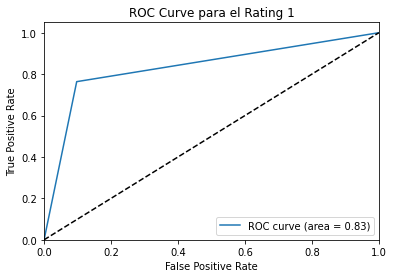

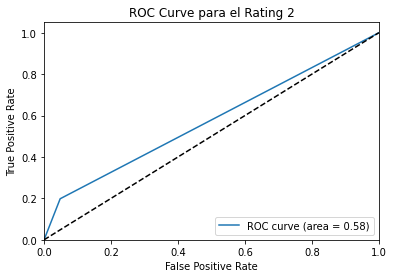

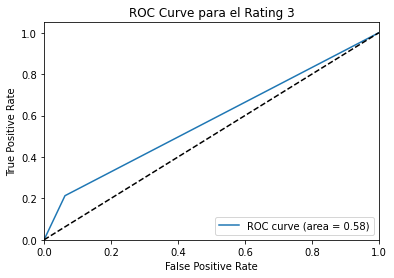

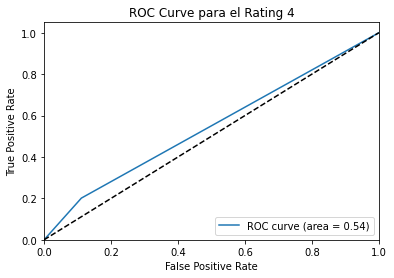

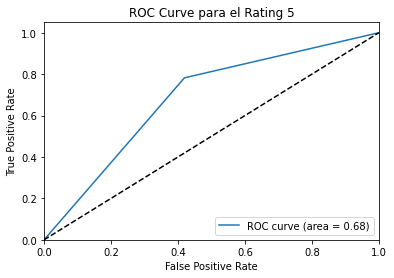

In [ ]:
roc_auc_nb = roc_multi_label(y_test, y_pred_nb, 5)

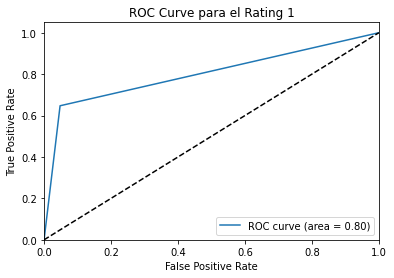

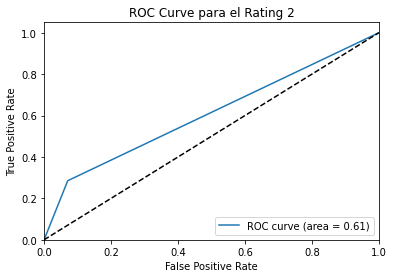

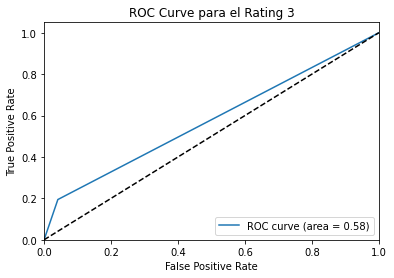

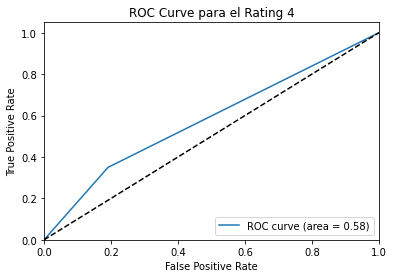

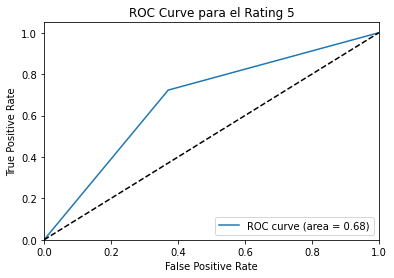

In [ ]:
roc_auc_nb2 = roc_multi_label(y_test, y_pred_nb2, 5)

## Sequencial Multi-Perceptron

In [ ]:
from keras.utils import to_categorical 


y_soft = to_categorical(df['Rating'], num_classes=6)


X_train_soft,X_test_soft,y_train_soft,y_test_soft = train_test_split(X,y_soft[:,1:],test_size=0.2,random_state=42)

print(X.shape)
print(X_train_soft.shape)

print(y_soft.shape)
print(y_train_soft.shape)

(20491, 152)
(16392, 152)
(20491, 6)
(16392, 5)


In [ ]:
y_soft

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
model1 = Sequential()

model1.add(Dense(128, input_dim=152)) # input_dim son las variables de entrada
model1.add(Dense(128, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(5, activation='softmax'))  # linear: sale lo que entra

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               19584     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total params: 38,245
Trainable params: 38,245
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(X_train_soft, y_train_soft, validation_data=(X_test_soft, y_test_soft), epochs=5, batch_size=128)

Epoch 1/5
129/129 [==============================] - 0s 4ms/step - loss: 1.1492 - accuracy: 0.5053 - val_loss: 1.0054 - val_accuracy: 0.5640
Epoch 2/5
129/129 [==============================] - 0s 2ms/step - loss: 0.9720 - accuracy: 0.5794 - val_loss: 0.9751 - val_accuracy: 0.5628
Epoch 3/5
129/129 [==============================] - 0s 2ms/step - loss: 0.9279 - accuracy: 0.5939 - val_loss: 0.9529 - val_accuracy: 0.5892
Epoch 4/5
129/129 [==============================] - 0s 2ms/step - loss: 0.9000 - accuracy: 0.6081 - val_loss: 0.9398 - val_accuracy: 0.5901
Epoch 5/5
129/129 [==============================] - 0s 2ms/step - loss: 0.8718 - accuracy: 0.6222 - val_loss: 0.9491 - val_accuracy: 0.5782


In [ ]:
y_pred_seq = model1.predict_classes(X_test_soft) + 1


clas_rep = classification_report(y_test, y_pred_seq)
print(clas_rep)

seq_class_rep_mets = get_mets(clas_rep)

              precision    recall  f1-score   support

           1       0.65      0.61      0.63       292
           2       0.36      0.36      0.36       333
           3       0.37      0.22      0.27       432
           4       0.52      0.36      0.43      1252
           5       0.64      0.85      0.73      1790

    accuracy                           0.58      4099
   macro avg       0.51      0.48      0.49      4099
weighted avg       0.55      0.58      0.55      4099



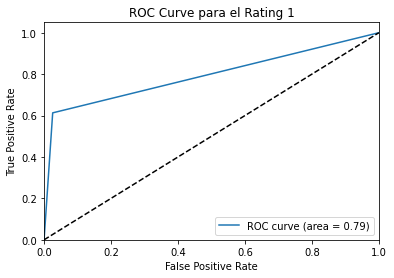

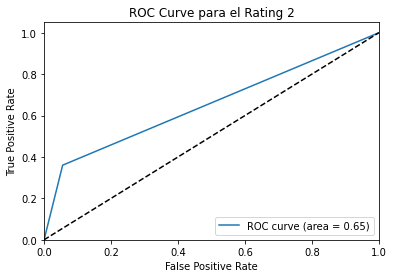

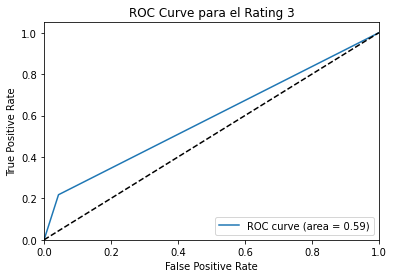

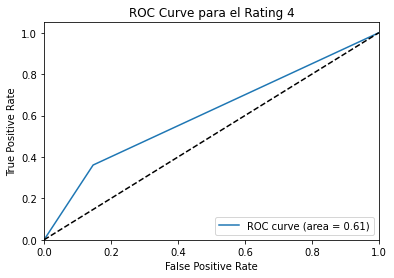

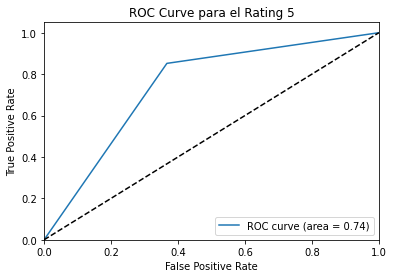

In [ ]:
roc_auc_seq = roc_multi_label(y_test, y_pred_seq, 5)

In [ ]:
model2 = Sequential()

model2.add(Dense(128, input_dim=152)) # input_dim son las variables de entrada
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
#model2.add(Dropout(0.5))
model2.add(Dense(5, activation='softmax'))  # linear: sale lo que entra

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
history2 = model2.fit(X_train_soft, y_train_soft, validation_data=(X_test_soft, y_test_soft), epochs=10, batch_size=128)

Epoch 1/10
129/129 [==============================] - 0s 3ms/step - loss: 1.1947 - accuracy: 0.4854 - val_loss: 1.0221 - val_accuracy: 0.5514
Epoch 2/10
129/129 [==============================] - 0s 2ms/step - loss: 1.0211 - accuracy: 0.5575 - val_loss: 0.9729 - val_accuracy: 0.5848
Epoch 3/10
129/129 [==============================] - 0s 2ms/step - loss: 0.9792 - accuracy: 0.5767 - val_loss: 0.9469 - val_accuracy: 0.5850
Epoch 4/10
129/129 [==============================] - 0s 2ms/step - loss: 0.9483 - accuracy: 0.5855 - val_loss: 0.9481 - val_accuracy: 0.5816
Epoch 5/10
129/129 [==============================] - 0s 2ms/step - loss: 0.9356 - accuracy: 0.5929 - val_loss: 1.0025 - val_accuracy: 0.5601
Epoch 6/10
129/129 [==============================] - 0s 2ms/step - loss: 0.9233 - accuracy: 0.5958 - val_loss: 0.9379 - val_accuracy: 0.5904
Epoch 7/10
129/129 [==============================] - 0s 3ms/step - loss: 0.9124 - accuracy: 0.6026 - val_loss: 0.9365 - val_accuracy: 0.5845
Epoch 

## Word Embbeding y Sequential

In [ ]:
#Cantidad de palabras unicas
voc_size=102008

#Mapeo de cada palabra a una ubicacion dentro del rango 0 - #Palabras_unicas
onehot_repr=[one_hot(words,voc_size)for words in df.Review]


In [ ]:
#La cantidad de palabras maximas
sent_length=df.word_count.max()

# Hacemos padding de las oraciones para que todas tengan las mismas dimensiones
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)

print(embedded_docs.shape)



(20491, 1931)


In [ ]:
#Separamos los datos en train y test

X_train_embedding,X_test_embedding,y_train_embedding,y_test_embedding = train_test_split(embedded_docs,y_soft[:,1:],test_size=0.2,random_state=42)

In [ ]:
dim=X_train_embedding.max()+1

model3 = Sequential()

model3.add(Embedding(input_dim=dim, output_dim=50, input_length=sent_length))
model3.add(Flatten())
#model3.add(Dense(1))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(5, activation='softmax'))  # linear: sale lo que entra


In [ ]:
model3.compile(optimizer='rmsprop',  # default lr=0.01 
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
history3 = model3.fit(X_train_embedding, y_train_embedding, validation_data=(X_test_embedding, y_test_embedding), epochs=7, batch_size=64)

Epoch 1/7
257/257 [==============================] - 26s 102ms/step - loss: 1.4951 - accuracy: 0.4014 - val_loss: 1.3647 - val_accuracy: 0.4364
Epoch 2/7
257/257 [==============================] - 26s 102ms/step - loss: 1.3732 - accuracy: 0.4428 - val_loss: 1.3547 - val_accuracy: 0.4367
Epoch 3/7
257/257 [==============================] - 26s 102ms/step - loss: 1.3722 - accuracy: 0.4428 - val_loss: 1.3547 - val_accuracy: 0.4367
Epoch 4/7
257/257 [==============================] - 26s 102ms/step - loss: 1.2371 - accuracy: 0.4684 - val_loss: 1.0758 - val_accuracy: 0.4850
Epoch 5/7
257/257 [==============================] - 26s 102ms/step - loss: 0.9936 - accuracy: 0.5431 - val_loss: 0.9272 - val_accuracy: 0.5743
Epoch 6/7
257/257 [==============================] - 26s 102ms/step - loss: 0.8583 - accuracy: 0.6122 - val_loss: 1.0530 - val_accuracy: 0.5240
Epoch 7/7
257/257 [==============================] - 26s 103ms/step - loss: 0.7445 - accuracy: 0.6722 - val_loss: 0.9028 - val_accuracy:

In [ ]:
y_pred_emb = model3.predict_classes(X_test_embedding) + 1


clas_rep = classification_report(y_test, y_pred_emb)
print(clas_rep)

emb_class_rep_mets = get_mets(clas_rep)

              precision    recall  f1-score   support

           1       0.61      0.58      0.60       292
           2       0.41      0.57      0.48       333
           3       0.41      0.25      0.31       432
           4       0.58      0.46      0.51      1252
           5       0.73      0.86      0.79      1790

    accuracy                           0.63      4099
   macro avg       0.55      0.54      0.54      4099
weighted avg       0.61      0.63      0.61      4099



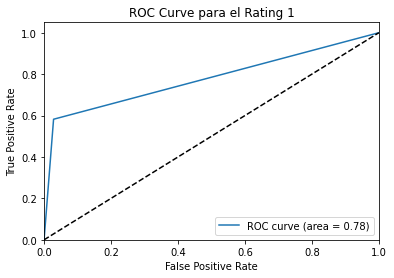

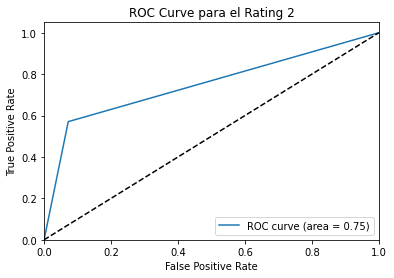

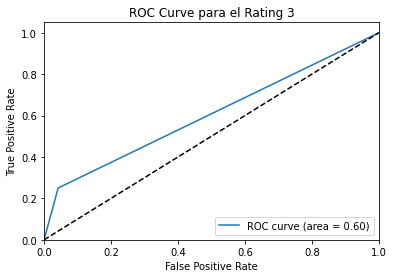

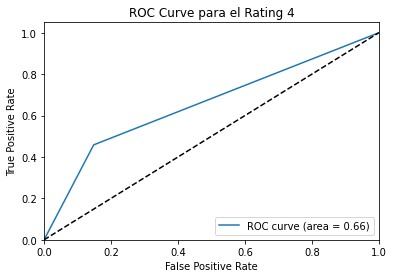

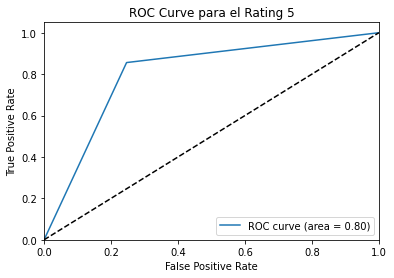

In [ ]:
roc_auc_emb = roc_multi_label(y_test, y_pred_emb, 5)

# Comparaciones Finales

In [ ]:
metrics = [rf_class_rep_mets, 
           lgbm_class_rep_mets, 
           xgb_class_rep_mets,
           nb_class_rep_mets, 
           nb2_class_rep_mets,
           seq_class_rep_mets,
           emb_class_rep_mets]

roc = [roc_auc_random, 
       roc_auc_lgbm, 
       roc_auc_xgb, 
       roc_auc_nb, 
       roc_auc_nb2, 
       roc_auc_seq,
       roc_auc_emb]

models = ['Random Forest', 'LGBM', 'XGBoosting', 'Naive Bayes', ' Gaussian Bayes', 'Sequencial', 'Embbeding']


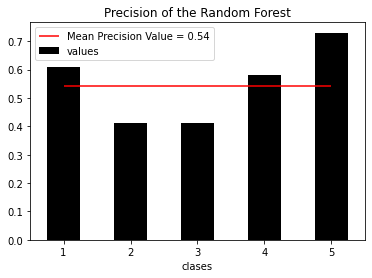

In [ ]:

mean = test.values[:,1].astype(float).mean()

test[test['metrics']=='precision'].plot(kind='bar', 
                                        title='Precision of the Random Forest', 
                                        rot=0, 
                                        colormap='gray')
plt.hlines(mean, xmin=0, xmax=4, colors='r', label='Mean Precision Value = {}'.format(round(mean,2)))
plt.legend()
plt.show()

In [ ]:
def multi_label_bar(data, axes, model_name, metric_name):
  
  data = data.set_index('clases')
  mean = data.values[:,1].astype(float).mean()
  
  data[data['metrics']==metric_name].plot(kind='bar', 
                                        title='{} of the {} model'.format(metric_name, model_name),
                                        ax=axes, 
                                        rot=0, 
                                        colormap='gray')
  
  axes.hlines(mean, xmin=0, xmax=4, colors='r')
  axes.annotate('Mean Precision Value = {}'.format(round(mean,2)), xy=(1,0.55), color="r", fontsize=12)

  

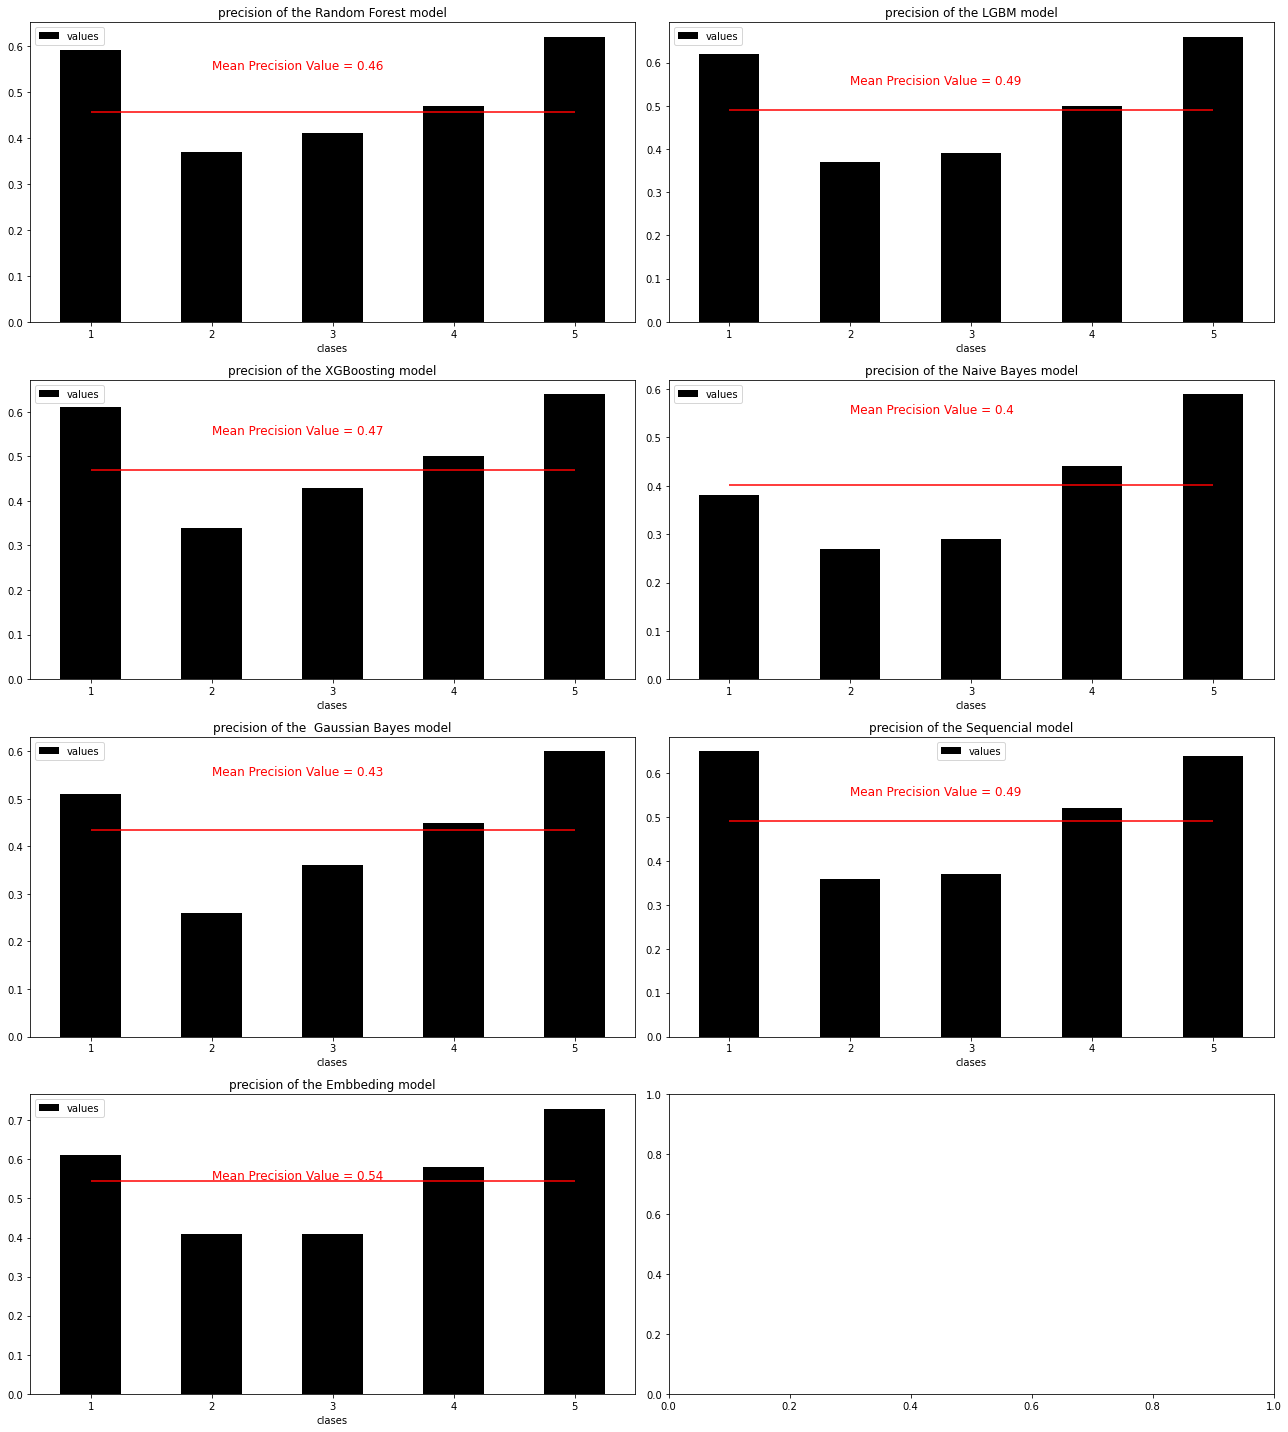

In [ ]:
#Establecemos la figura del grafico y su tamaño
#Le definimos que van a ser varios graficos
_, axs = plt.subplots(nrows=4, ncols=2, figsize=(18,20))

#graficos

for i,axes, values in zip(range(0,7), axs.flat, metrics):
  multi_label_bar(values, axes, models[i], 'precision')


plt.tight_layout()

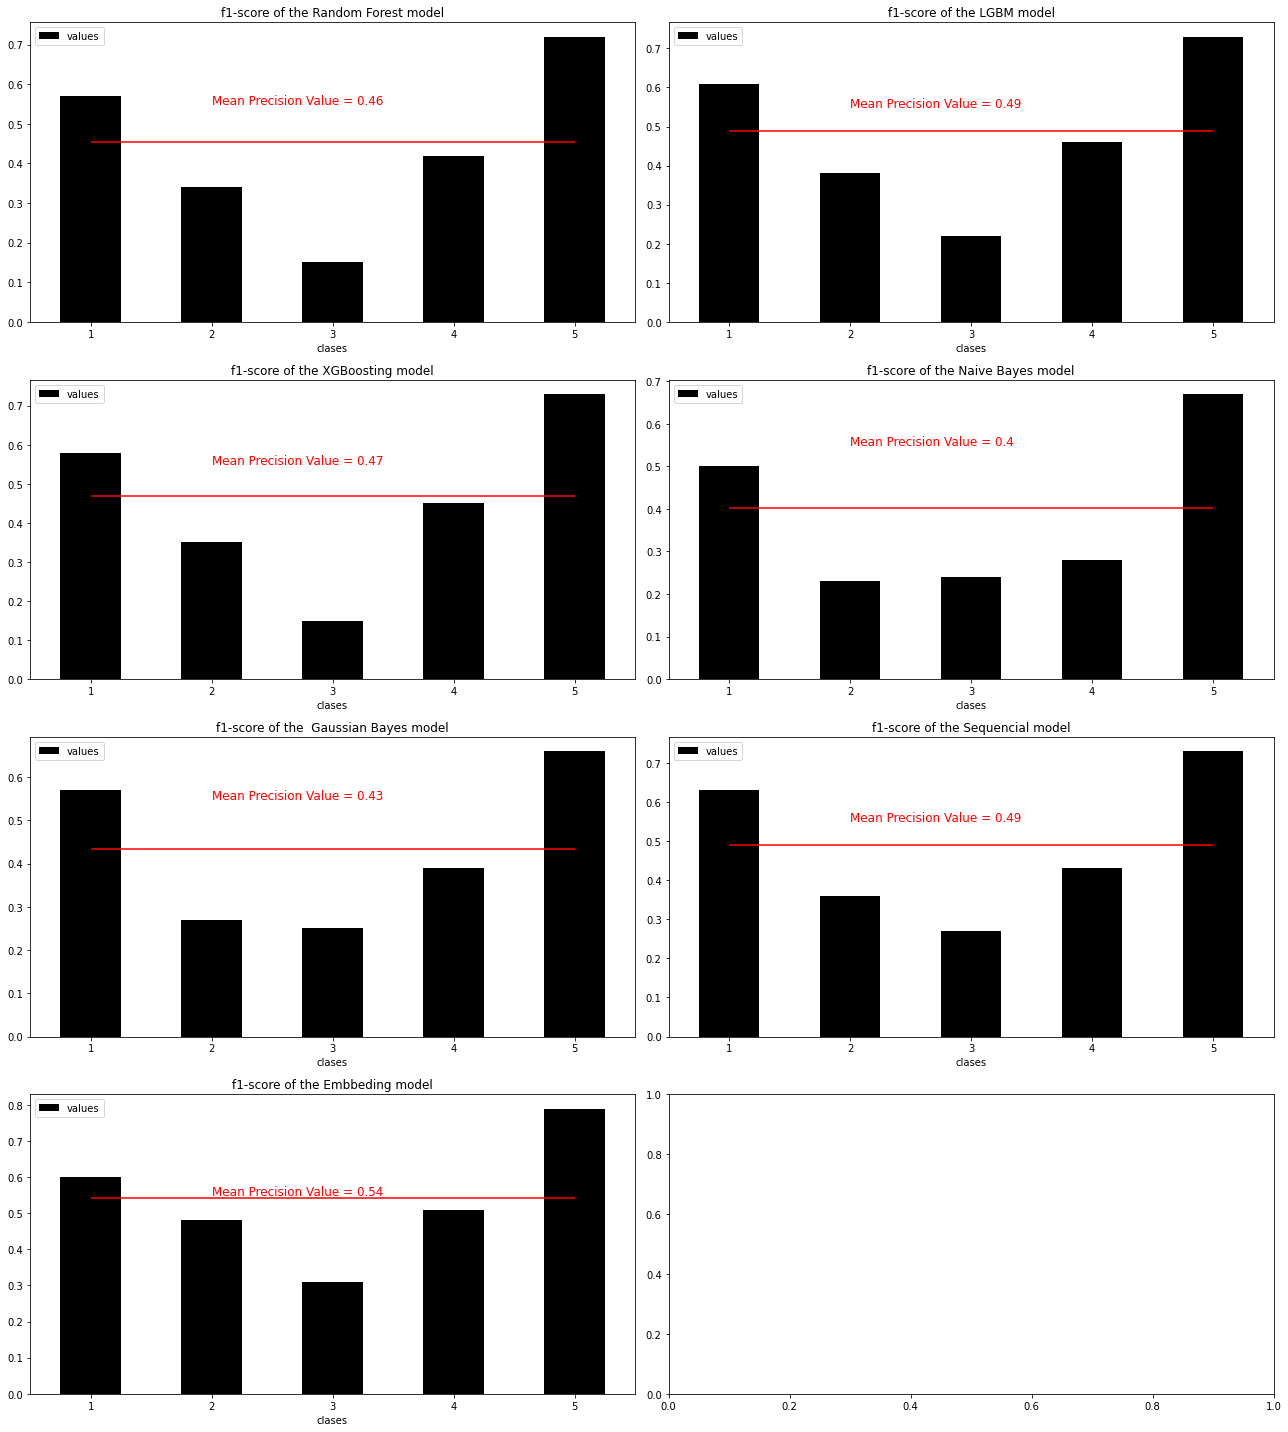

In [ ]:
#Establecemos la figura del grafico y su tamaño
#Le definimos que van a ser varios graficos
_, axs = plt.subplots(nrows=4, ncols=2, figsize=(18,20))

#graficos

for i,axes, values in zip(range(0,7), axs.flat, metrics):
  multi_label_bar(values, axes, models[i], 'f1-score')


plt.tight_layout()

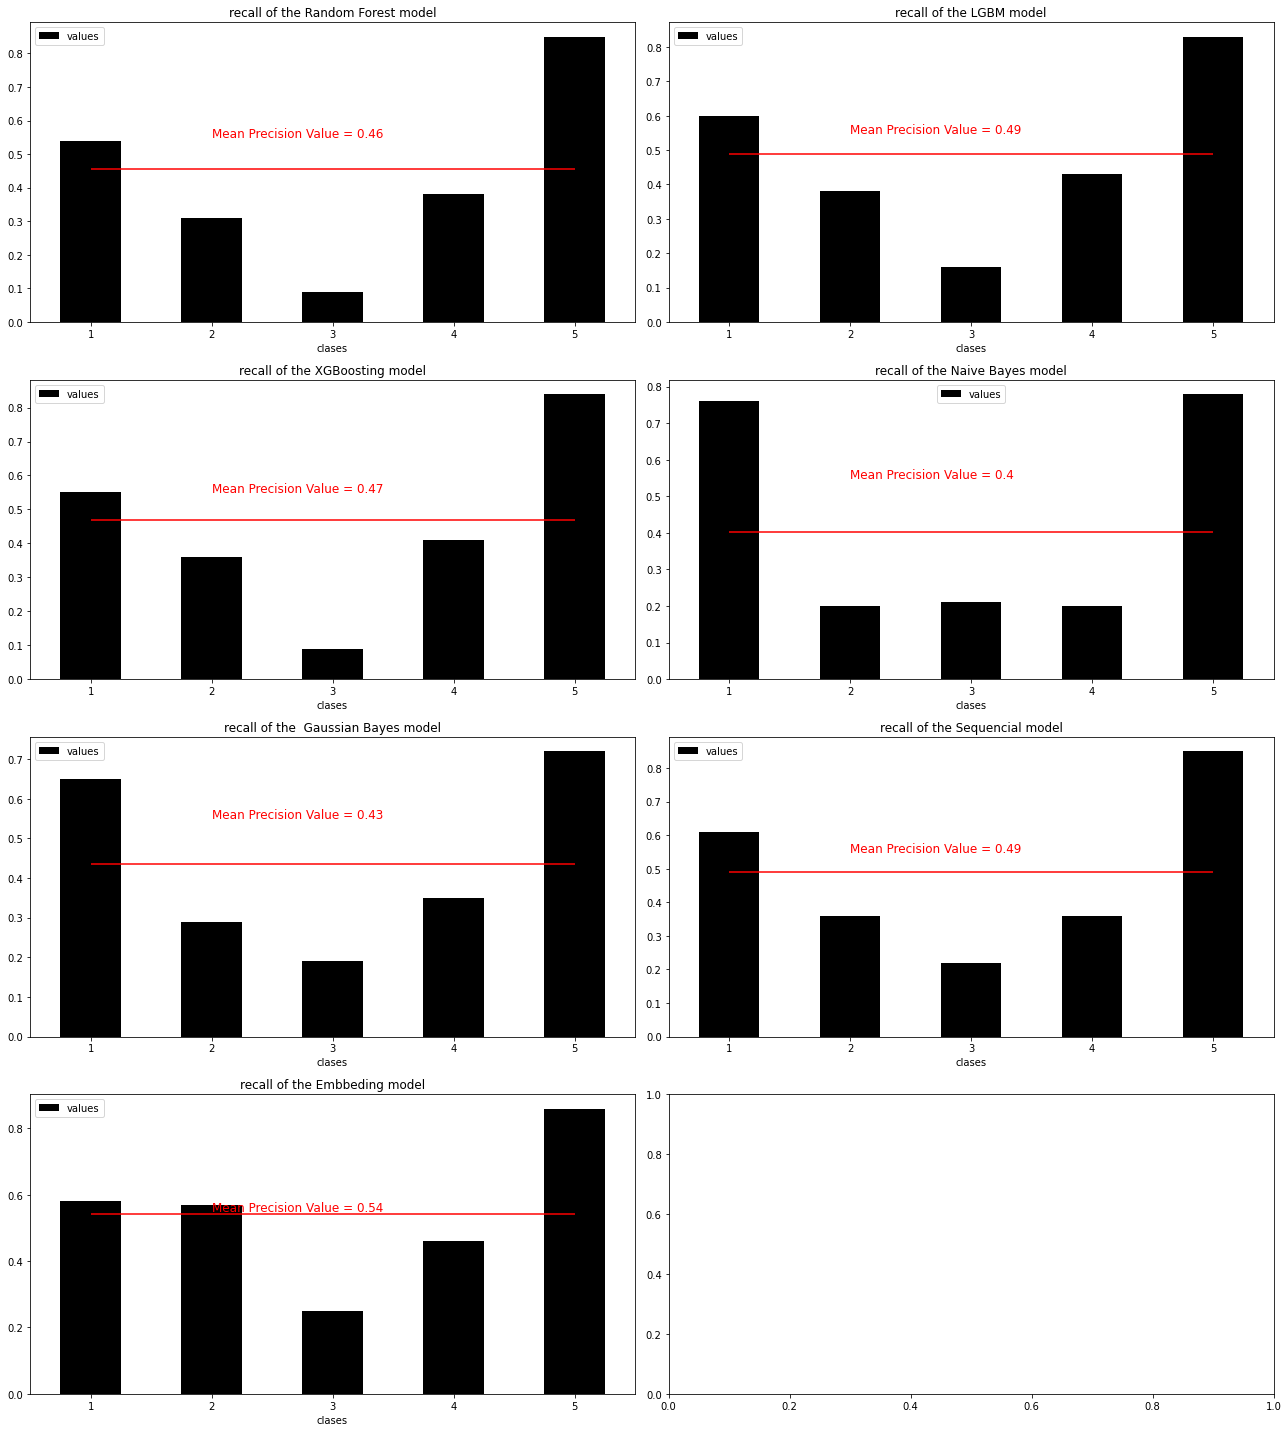

In [ ]:
#Establecemos la figura del grafico y su tamaño
#Le definimos que van a ser varios graficos
_, axs = plt.subplots(nrows=4, ncols=2, figsize=(18,20))

#graficos

for i,axes, values in zip(range(0,7), axs.flat, metrics):
  multi_label_bar(values, axes, models[i], 'recall')


plt.tight_layout()

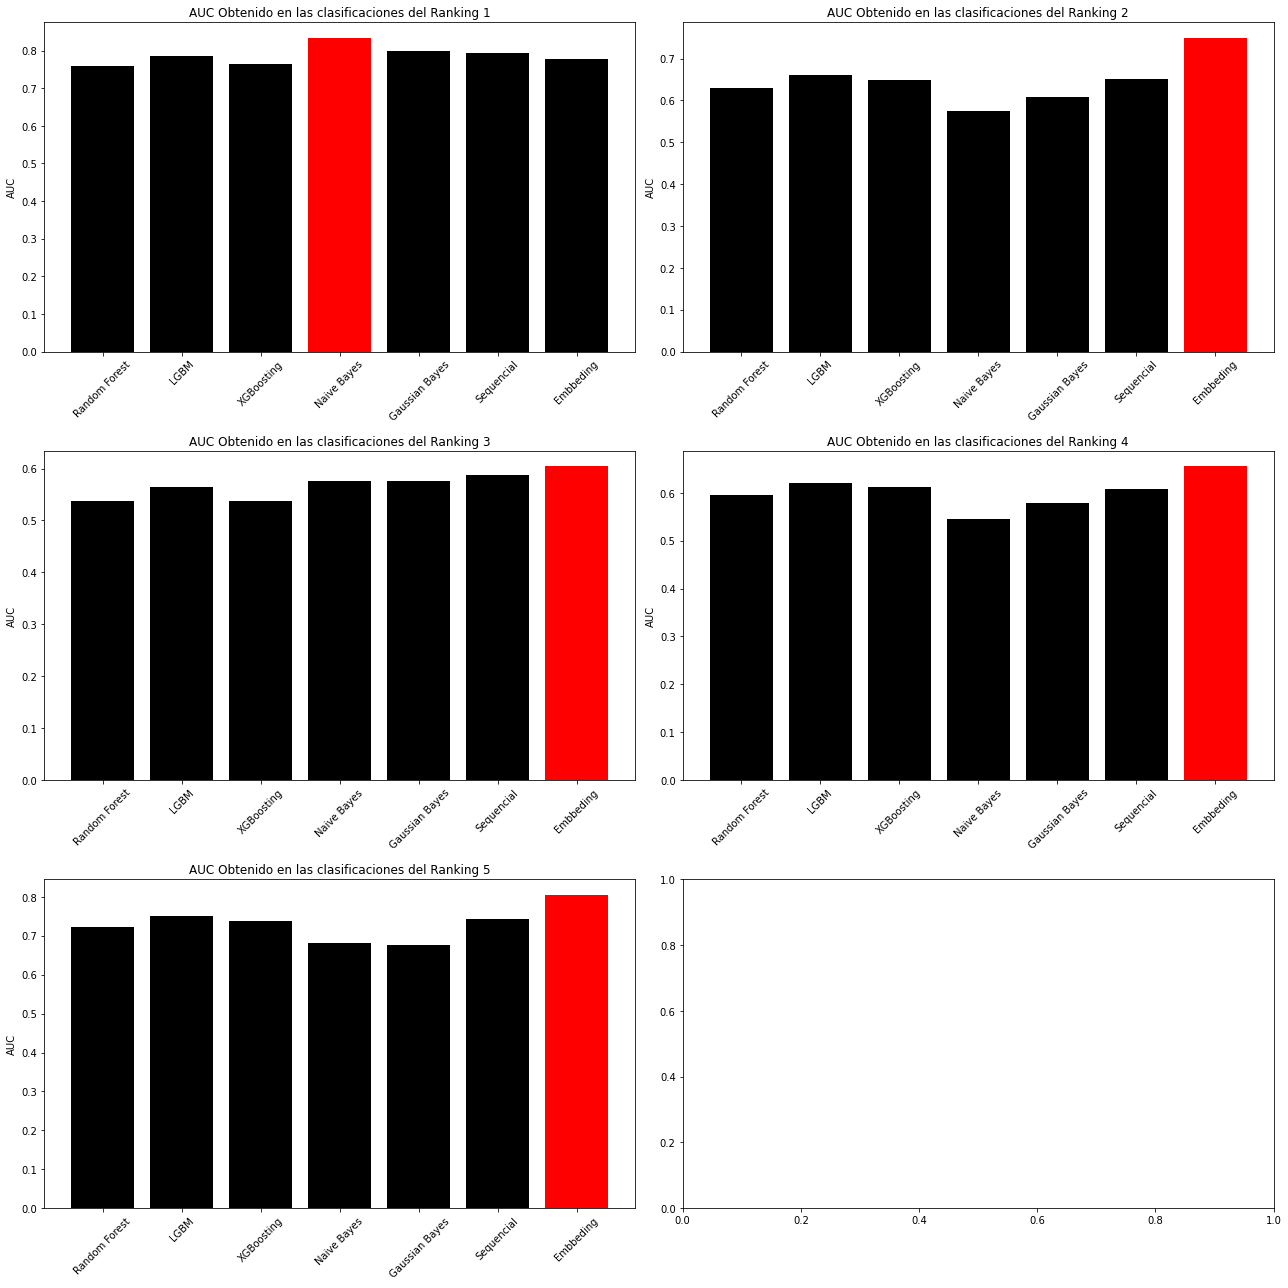

In [ ]:
_, axs = plt.subplots(nrows=3, ncols=2, figsize=(18,18))



for cls,axes in zip(range(0,5), axs.flat):
  valu=[]
  for i in range(0,7):
    valu.append(roc[i][cls])

  colors = []
  for hight in valu: # keys are the names of the boys
      if hight == max(valu):
          colors.append('r')
      else:
          colors.append('black')

  axes.bar(models, valu, color=colors)
  axes.set_xticklabels(models, rotation=45)
  axes.set_ylabel('AUC')
  axes.set_title('AUC Obtenido en las clasificaciones del Ranking {}'.format(cls+1))

plt.tight_layout()

# Conclusiones Finales

> El modelo que en la mayoria de las metricas tiene la mejor performance es el modelo que se entrena utilizando los embbedings.

## Posibles alternativas a probar despues.

- Utilizar los N-grams 2 y 3 como features para entrenar los modelos y el embedding.
- Seguir trabajando sobre las features para mejorarlas.
- Probar distintas arquitecturas a las usadas.
- Trabajar con los Hyperparametros para seguir ajustando nuestros modelos a este problema puntual.